In [3]:
# Importare il dataset #

import pandas as pd


data1 = pd.read_csv('Country-data.csv', delimiter=',', header='infer')
data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data1['country']

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

**Decision tree classifier**

In [5]:
# DECISION TREE CLASSIFIER #

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Definizione di variabili e target
data1["status"] = data1["gdpp"].apply(lambda x: 1 if x > 10000 else 0)

X = data1[["child_mort", "income", "life_expec", "health"]]
y = data1["status"]

# Addetrare il modello
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
clf = DecisionTreeClassifier(criterion="gini",random_state=42, max_depth=4)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

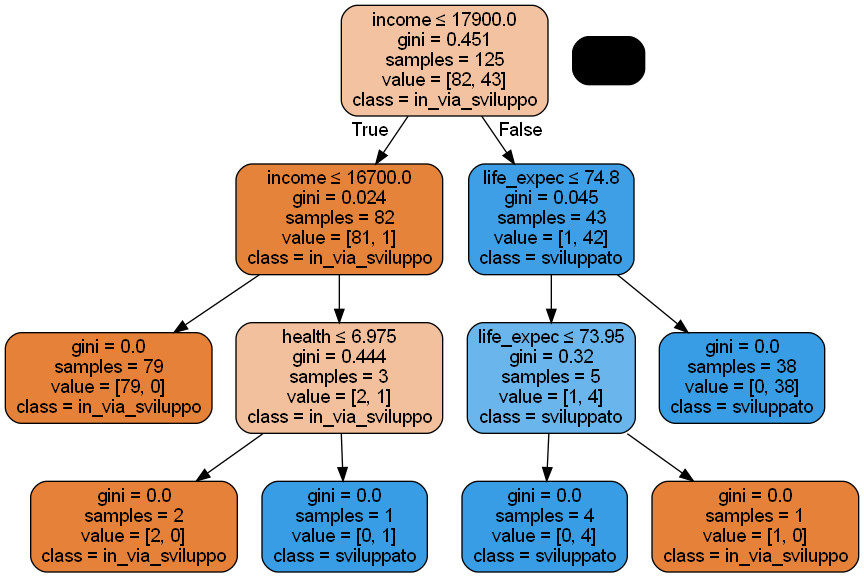

In [6]:
from sklearn import tree
import pydotplus
from IPython.display import Image

# Esportare l'albero decisionale
dot_data = tree.export_graphviz(
    clf,
    feature_names=X.columns,
    class_names=['in_via_sviluppo','sviluppato'],  # Etichette leggibili
    filled=True,
    rounded=True,
    special_characters=True,
    out_file=None
)

# Creazione del grafico
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [7]:
from sklearn.metrics import accuracy_score

predY = clf.predict(X_test)
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predY)))

Accuracy on test data is 0.88


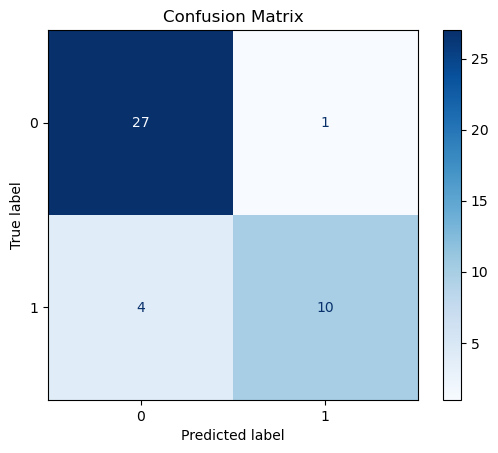

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predY, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

**Nearest Neighbor Classifier**

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)


In [11]:
from sklearn.neighbors import KNeighborsClassifier

k = 6
clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
clf.fit(X_train, y_train)

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

trainAcc = accuracy_score(y_train, Y_predTrain)
testAcc = accuracy_score(y_test, Y_predTest)

print(f'Train Accuracy {trainAcc}')
print(f'Test Accuracy {testAcc}')

Train Accuracy 0.9482758620689655
Test Accuracy 0.9411764705882353


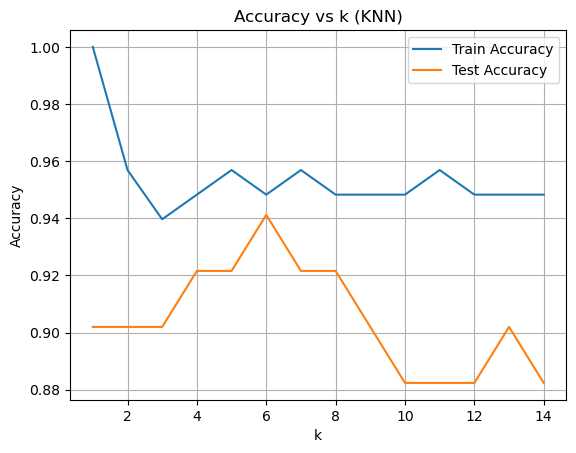

In [12]:
import numpy as np
import matplotlib.pyplot as plt

train_acc = []
test_acc = []
k_values = range(1, 15)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

plt.plot(k_values, train_acc, label='Train Accuracy')
plt.plot(k_values, test_acc, label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k (KNN)')
plt.legend()
plt.grid(True)
plt.show()


**Model overfitting**

Text(0, 0.5, 'Accuracy')

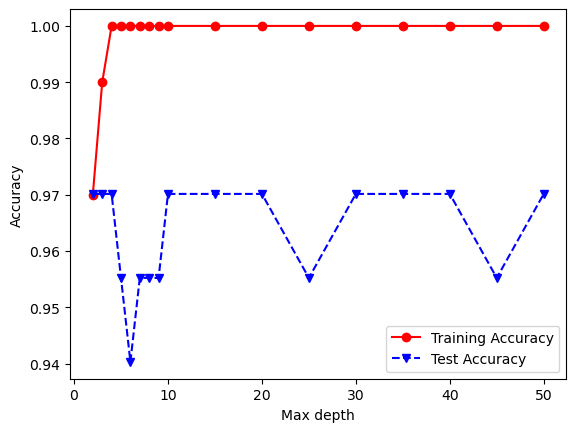

In [13]:
#########################################
# Training and Test set creation
#########################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

**Support vector Machines**

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


Decidere quale kernel usare:

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

# Ensure X_scaled is defined
from sklearn.preprocessing import StandardScaler
X = data1.drop(columns=["country", "gdpp", "status"], errors="ignore")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kernels = ["linear", "rbf", "poly", "sigmoid"]
scores = {}

for kernel in kernels:
    model = SVC(kernel=kernel)
    score = cross_val_score(model, X_scaled, y, cv=5, scoring="accuracy")
    scores[kernel] = score
    print(f"Kernel: {kernel}\tAccuracy media: {np.mean(score):.4f} ± {np.std(score):.4f}")

Kernel: linear	Accuracy media: 0.9041 ± 0.0225
Kernel: rbf	Accuracy media: 0.9166 ± 0.0339
Kernel: poly	Accuracy media: 0.8447 ± 0.0327
Kernel: sigmoid	Accuracy media: 0.8738 ± 0.0587


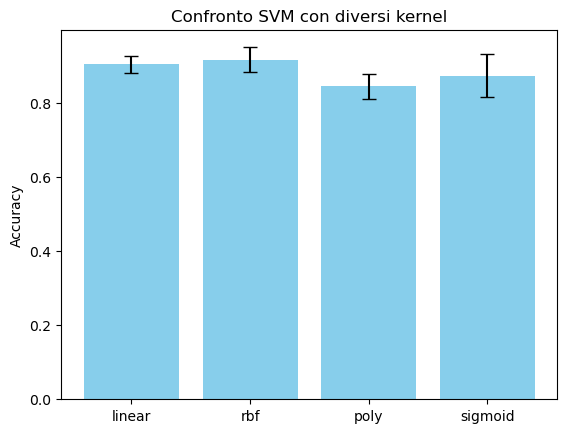

In [17]:
import matplotlib.pyplot as plt

means = [np.mean(scores[k]) for k in kernels]
errors = [np.std(scores[k]) for k in kernels]

plt.bar(kernels, means, yerr=errors, color="skyblue", capsize=5)
plt.ylabel("Accuracy")
plt.title("Confronto SVM con diversi kernel")
plt.show()

L'accuracy più alta si trova per il kernel rbf. Per brevità verrà mostrato solo tale kernel, i risultati degli altri kenrel(ad eccezione del poly) sono simili.

Scelta dell'iperparametro:

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000,10000]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
grid.fit(X_scaled, y)

print("Miglior valore di C:", grid.best_params_['C'])
print("Accuracy media:", grid.best_score_)

Miglior valore di C: 1000
Accuracy media: 0.9283422459893048


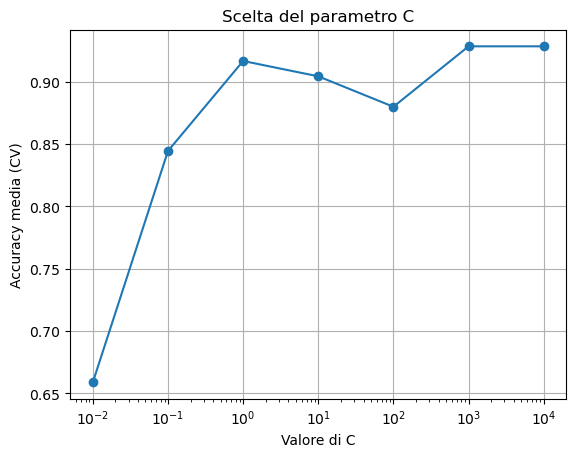

In [22]:
import matplotlib.pyplot as plt

results = grid.cv_results_
plt.plot(param_grid['C'], results['mean_test_score'], marker='o')
plt.xscale('log')
plt.xlabel("Valore di C")
plt.ylabel("Accuracy media (CV)")
plt.title("Scelta del parametro C")
plt.grid(True)
plt.show()

Scelta della coppia di feauture da usare nella rappresentazione del confine decisionale:

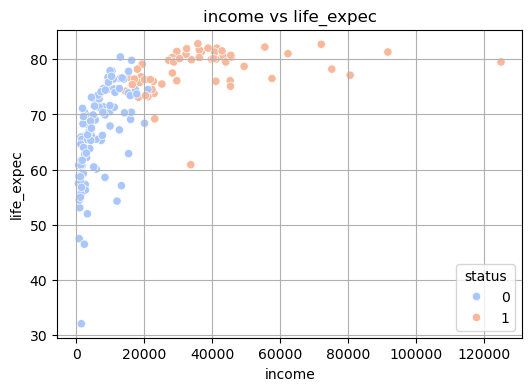

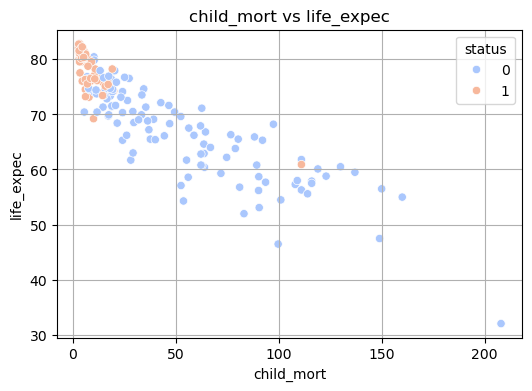

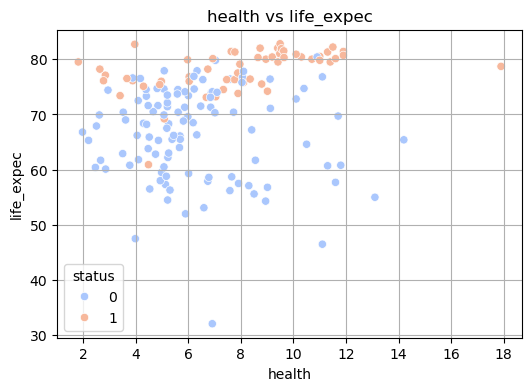

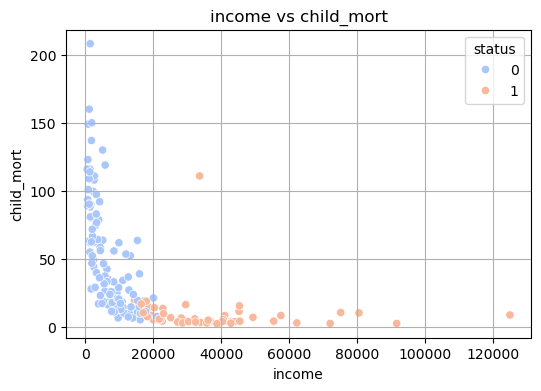

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creazione etichette binarie (se non già fatto)
data1["status"] = data1["gdpp"].apply(lambda x: 1 if x > 10000 else 0)

def plot_pair(x, y):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data1, x=x, y=y, hue="status", palette="coolwarm")
    plt.title(f"{x} vs {y}")
    plt.grid(True)
    plt.show()

# Coppie candidate:
plot_pair("income", "life_expec")
plot_pair("child_mort", "life_expec")
plot_pair("health", "life_expec")
plot_pair("income", "child_mort")


Le feature scelte sono *income* e *child_mort*, in quanto sono le più discriminanti per separare gli stati in via di sviluppo da quelli sviluppati

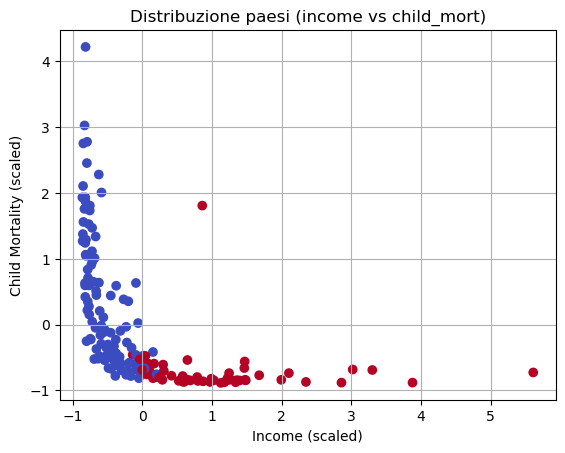

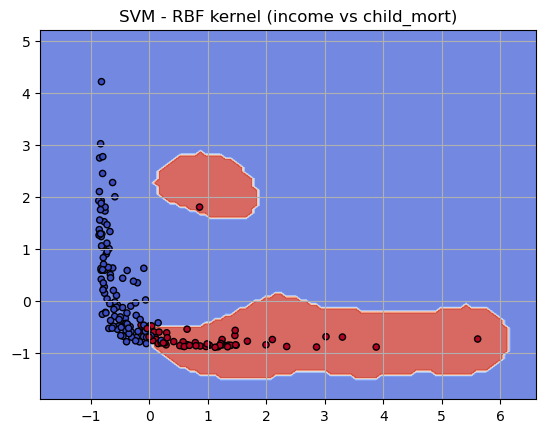

In [23]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

# === 1. Prepara i dati ===
# Usa due feature: income e child_mort
X = data1[["income", "child_mort"]].values

# Etichette binarie: 1 = sviluppato, 0 = in via di sviluppo
y = [1 if x > 10000 else 0 for x in data1["gdpp"]]

# Standardizzazione
X = StandardScaler().fit_transform(X)

# === 2. Visualizza i punti ===
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title("Distribuzione paesi (income vs child_mort)")
plt.xlabel("Income (scaled)")
plt.ylabel("Child Mortality (scaled)")
plt.grid(True)
plt.show()

# === 3. Allena SVM e visualizza decision boundary ===
model = SVC(kernel="rbf", gamma=0.7, C=1000)
model.fit(X, y)

fig, ax = plt.subplots()
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=ax,
)

# Punti di training
X0, X1 = X[:, 0], X[:, 1]
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_title("SVM - RBF kernel (income vs child_mort)")
plt.grid(True)
plt.show()


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        45
           1       0.85      0.77      0.81        22

    accuracy                           0.88        67
   macro avg       0.87      0.85      0.86        67
weighted avg       0.88      0.88      0.88        67



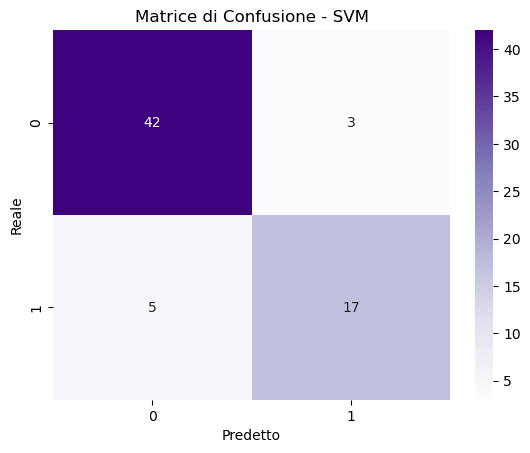

In [25]:
# Inizializza e allena il classificatore
svm = SVC(kernel='rbf', C=1000, gamma='scale')  
svm.fit(X_train, Y_train)

# Previsioni
y_pred_svm = svm.predict(X_test)

# Report prestazioni
print("SVM Classification Report:")
print(classification_report(Y_test, y_pred_svm))

# Matrice di confusione
cm = confusion_matrix(Y_test, y_pred_svm)
sns.heatmap(cm, annot=True, cmap="Purples", fmt="d")
plt.title("Matrice di Confusione - SVM")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.show()


**Regressione** forse

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# === Prepara i dati ===
# Rimuovi colonne inutili
X = data1.drop(columns=["gdpp", "country", "status"], errors="ignore")
y = data1["gdpp"]

# Standardizza le feature (opzionale ma utile)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split del dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# === Applica la regressione lineare ===
model = LinearRegression()
model.fit(X_train, y_train)

# Previsioni
y_pred = model.predict(X_test)

# === Valutazione ===
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📈 Risultati della regressione lineare:")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² score: {r2:.2f}")


📈 Risultati della regressione lineare:
✅ RMSE: 5500.54
✅ R² score: 0.84


**Clustering**

In [27]:
from sklearn.preprocessing import StandardScaler

# Seleziona solo le feature numeriche rilevanti
X = data1.drop(columns=["country", "gdpp", "status"], errors="ignore")

# Standardizza le feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


c:\Users\Utente\anaconda3\envs\DMtest\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


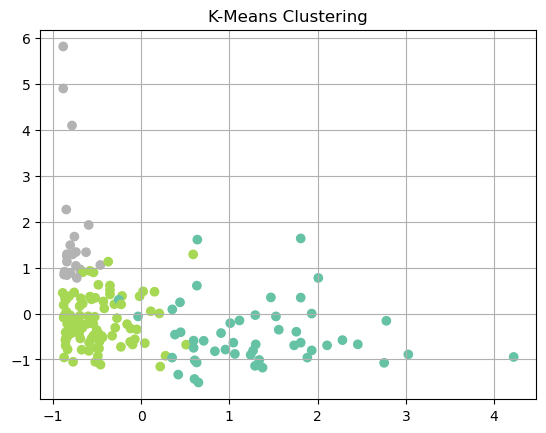

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

data1["kmeans_cluster"] = kmeans_labels

# Visualizza
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap="Set2")
plt.title("K-Means Clustering")
plt.grid(True)
plt.show()


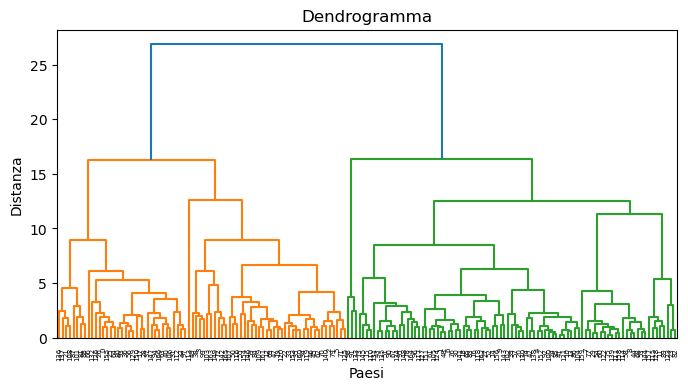

In [29]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Dendrogramma (facoltativo, per capire quante classi)
plt.figure(figsize=(8, 4))
sch.dendrogram(sch.linkage(X_scaled, method="ward"))
plt.title("Dendrogramma")
plt.xlabel("Paesi")
plt.ylabel("Distanza")
plt.show()

# Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_scaled)
data1["agg_cluster"] = agg_labels


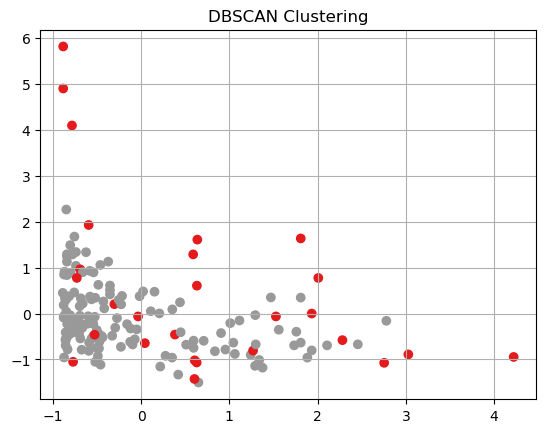

In [30]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

data1["dbscan_cluster"] = dbscan_labels

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap="Set1")
plt.title("DBSCAN Clustering")
plt.grid(True)
plt.show()


In [31]:
print(data1[["country", "kmeans_cluster", "agg_cluster", "dbscan_cluster"]].head())


               country  kmeans_cluster  agg_cluster  dbscan_cluster
0          Afghanistan               0            0               0
1              Albania               1            1               0
2              Algeria               1            0               0
3               Angola               0            0              -1
4  Antigua and Barbuda               1            1               0
